In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
### Make sure your environment is compatible with the notebook
from platform import python_version
print(python_version()) # 3.7 or later 
print(pickle.format_version) # 4.0 or later
print(pd.__version__) # 1.1.1 or later

3.8.6
4.0
1.1.4


In [3]:
### Loading Player Names
f = open('/home/hemanth/Documents/XGBoosting/players.pickle', 'rb')
players = pickle.load(f)
f.close()

In [4]:
len(players)

399

In [5]:
### Loading Player Stats
f = open('/home/hemanth/Documents/XGBoosting/stats.pickle', 'rb')
stats = pickle.load(f)
f.close()

In [6]:
len(stats)

399

In [7]:
stats[players[0]].head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,PLAYER
2010-10-22,9943245.83,0.892601,50.000000,50.000000,0.892601,1.083277,71.530598,11.261898,1.588102,23.286444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,INTC
2010-10-29,12185267.20,1.080951,100.000000,57.142857,1.080951,0.871369,66.142720,7.776916,3.640898,24.879325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,INTC
2010-11-05,11886010.20,2.468281,100.000000,92.857143,2.468281,1.438770,79.540825,7.020958,6.614878,30.835548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,INTC
2010-11-12,21672614.72,3.133374,100.000000,92.857143,3.133374,2.482870,59.842708,13.579407,6.874129,32.613393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,INTC
2010-11-19,10384513.17,3.155387,64.285714,50.000000,3.155387,3.131106,44.824987,17.177860,-0.496806,24.400856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,INTC


In [8]:
stats[players[0]].tail()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,PLAYER
2020-09-04,2.169384e+07,1.563908,85.714286,71.428571,1.563908,0.190052,55.693854,21.850019,1.597444,25.886198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,INTC
2020-09-11,1.445558e+07,1.337074,57.142857,57.142857,1.337074,1.309469,57.222181,21.201457,-0.243506,20.025302,...,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,INTC
2020-09-18,2.500661e+07,0.608518,21.428571,-35.714286,0.608518,1.159702,42.334278,21.588166,-1.002205,20.395867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,INTC
2020-09-25,1.330073e+07,-0.328599,0.000000,-92.857143,-0.328599,0.319058,38.820142,21.173504,1.321586,19.971552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,INTC
2020-10-02,1.007800e+07,0.079142,100.000000,21.428571,0.079142,0.065173,45.202965,18.461192,2.324673,25.407640,...,0.0,0.0,0.0,-100.0,-100.0,0.0,0.0,0.0,0.0,INTC


In [9]:
### Loading Player Performance
f = open('/home/hemanth/Documents/XGBoosting/performance.pickle', 'rb')
performance = pickle.load(f)
f.close()

In [10]:
performance.tail()

Performance
date       PLAYER            
2020-10-02 NSC              1
           VNO              1
           CAG              4
           LLY              6
           MET              6

In [11]:
### Loading timestamps we have data for
dates = performance.index.get_level_values(0).unique()
dates

DatetimeIndex(['2010-10-22', '2010-10-29', '2010-11-05', '2010-11-12',
               '2010-11-19', '2010-11-26', '2010-12-03', '2010-12-10',
               '2010-12-17', '2010-12-24',
               ...
               '2020-07-31', '2020-08-07', '2020-08-14', '2020-08-21',
               '2020-08-28', '2020-09-04', '2020-09-11', '2020-09-18',
               '2020-09-25', '2020-10-02'],
              dtype='datetime64[ns]', name='date', length=520, freq=None)

In [12]:
top_list_df = pd.DataFrame(index=dates, columns = range(20))
bottom_list_df = pd.DataFrame(index=dates, columns = range(20))

In [13]:
top_list_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
date,,,,,,,,,,,,,,,,,,,,
2010-10-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
bottom_list_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
date,,,,,,,,,,,,,,,,,,,,
2020-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
### Implement your system here
import random
for date in dates:
    top_list_df.loc[date,:] = random.sample(players, 20)
    remaining_players = [x for x in players if x not in top_list_df.loc[date,:]]
    bottom_list_df.loc[date,:] = random.sample(remaining_players, 20)

In [16]:
def score(top_list_df, bottom_list_df, performance):
    scores = pd.Series(index=dates, dtype=int)
    for date in dates:
        date_perf = performance.loc[[date]].droplevel(level=0)['Performance'].astype('int')
        scores[date] = date_perf.loc[top_list_df.loc[date,:]].sum() - \
                        date_perf.loc[bottom_list_df.loc[date,:]].sum()
    return scores, scores.sum()

In [17]:
scores, total = score(top_list_df, bottom_list_df, performance)

Total Score 223


<AxesSubplot:xlabel='date'>

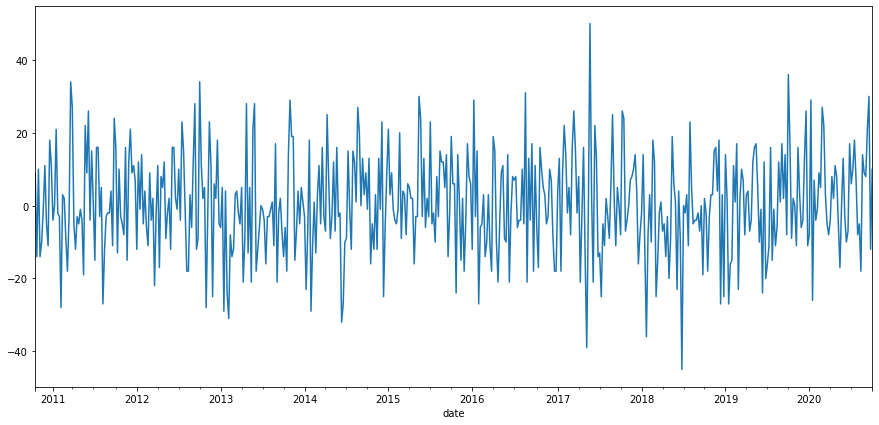

In [18]:
print('Total Score %i'%total)
scores.plot(figsize=(15,7))

## Evaluation:

In [20]:
performance.columns

Index(['Performance'], dtype='object')

In [21]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

In [22]:
bottom_list_df[0]= le.fit_transform(bottom_list_df[0]) 
bottom_list_df[1]= le.fit_transform(bottom_list_df[1]) 


bottom_list_df[2]= le.fit_transform(bottom_list_df[2]) 
bottom_list_df[3]= le.fit_transform(bottom_list_df[3]) 

bottom_list_df[4]= le.fit_transform(bottom_list_df[4]) 
bottom_list_df[5]= le.fit_transform(bottom_list_df[5]) 

bottom_list_df[6]= le.fit_transform(bottom_list_df[6]) 
bottom_list_df[7]= le.fit_transform(bottom_list_df[7]) 

bottom_list_df[8]= le.fit_transform(bottom_list_df[8]) 
bottom_list_df[9]= le.fit_transform(bottom_list_df[9]) 

bottom_list_df[10]= le.fit_transform(bottom_list_df[10]) 
bottom_list_df[11]= le.fit_transform(bottom_list_df[11]) 

bottom_list_df[12]= le.fit_transform(bottom_list_df[12]) 
bottom_list_df[13]= le.fit_transform(bottom_list_df[13]) 

bottom_list_df[14]= le.fit_transform(bottom_list_df[14]) 
bottom_list_df[15]= le.fit_transform(bottom_list_df[15]) 

bottom_list_df[16]= le.fit_transform(bottom_list_df[16]) 
bottom_list_df[17]= le.fit_transform(bottom_list_df[17]) 

bottom_list_df[18]= le.fit_transform(bottom_list_df[18]) 
bottom_list_df[19]= le.fit_transform(bottom_list_df[19]) 

In [23]:
bottom_list_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
date,,,,,,,,,,,,,,,,,,,,
2010-10-22,72,171,195,189,242,12,128,26,75,34,146,125,142,22,224,249,245,226,134,287
2010-10-29,275,41,91,193,169,137,43,193,123,1,192,40,114,138,7,102,98,58,23,279
2010-11-05,247,71,161,81,263,208,205,10,271,105,136,234,101,35,278,259,11,78,213,134
2010-11-12,53,43,1,151,76,162,272,167,102,275,202,136,251,187,104,217,54,24,239,269
2010-11-19,212,39,136,173,71,156,119,249,161,193,217,263,61,19,186,50,130,232,277,185


In [24]:
top_list_df[0]= le.fit_transform(top_list_df[0]) 
top_list_df[1]= le.fit_transform(top_list_df[1]) 

top_list_df[2]= le.fit_transform(top_list_df[2]) 
top_list_df[3]= le.fit_transform(top_list_df[3]) 

top_list_df[4]= le.fit_transform(top_list_df[4]) 
top_list_df[5]= le.fit_transform(top_list_df[5]) 

top_list_df[6]= le.fit_transform(top_list_df[6]) 
top_list_df[7]= le.fit_transform(top_list_df[7]) 

top_list_df[8]= le.fit_transform(top_list_df[8]) 
top_list_df[9]= le.fit_transform(top_list_df[9]) 

top_list_df[10]= le.fit_transform(top_list_df[10]) 
top_list_df[11]= le.fit_transform(top_list_df[11]) 

top_list_df[12]= le.fit_transform(top_list_df[12]) 
top_list_df[13]= le.fit_transform(top_list_df[13]) 

top_list_df[14]= le.fit_transform(top_list_df[14]) 
top_list_df[15]= le.fit_transform(top_list_df[15]) 

top_list_df[16]= le.fit_transform(top_list_df[16]) 
top_list_df[17]= le.fit_transform(top_list_df[17]) 

top_list_df[18]= le.fit_transform(top_list_df[18]) 
top_list_df[19]= le.fit_transform(top_list_df[19]) 

In [25]:
top_list_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
date,,,,,,,,,,,,,,,,,,,,
2020-09-04,213,72,19,78,290,81,210,213,252,246,61,282,115,40,258,265,100,175,30,213
2020-09-11,8,46,182,97,263,100,124,110,94,142,272,274,3,16,284,126,158,98,120,258
2020-09-18,232,228,201,254,124,180,244,251,80,176,257,93,183,75,22,224,146,132,232,96
2020-09-25,120,228,177,57,109,266,285,233,225,20,88,17,231,17,131,45,197,54,148,272
2020-10-02,268,30,232,43,244,47,45,0,124,140,68,104,266,15,124,200,80,156,249,84


In [26]:
top_list_df.shape

(520, 20)

In [28]:
bottom_list_df.shape

(520, 20)

In [29]:
performance.shape

(207480, 1)

In [31]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    #('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])
pipeline.steps

[('clf', LogisticRegression())]

In [32]:
x=0
y=520
data=performance[x:y]

In [33]:
data.shape

(520, 1)

### Method-1

### top_list_Data

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(top_list_df,data,test_size=0.20,random_state=2)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(416, 20)
(104, 20)
(416, 1)
(104, 1)


In [36]:
from sklearn.model_selection import cross_validate
scores = cross_validate(pipeline, X_train, y_train)
scores

/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

{'fit_time': array([0.19918156, 0.03813648, 0.03241682, 0.01551771, 0.01672244]),
 'score_time': array([0.00182343, 0.00182724, 0.00176692, 0.00153661, 0.00168014]),
 'test_score': array([0.13095238, 0.21686747, 0.15662651, 0.24096386, 0.25301205])}

In [37]:
scores['test_score'].mean()


0.19968445209409064

In [38]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.025731277465820313
fit_time  std  0.007996618752322777
score_time  mean  0.0017105579376220704
score_time  std  9.246997509051976e-05
test_score  mean  0.19968445209409064
test_score  std  0.04779364407147929
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.009464073181152343
fit_time  std  0.00011959047408731579
score_time  mean  0.0025607585906982423
score_time  std  0.0002164431882059602
test_score  mean  0.1755020080321285
test_score  std  0.03020336654933842
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.011086273193359374
fit_time  std  0.002958211362599939
score_time  mean  0.0025491237640380858
score_time  std  0.00018359545871137305
test_score  mean  0.1755020080321285
test_score  std  0.03020336654933842


/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

---------------------------------
KNeighborsClassifier(n_neighbors=3)
-----------------------------------
fit_time  mean  0.006419324874877929
fit_time  std  0.005673988940281204
score_time  mean  0.004886054992675781
score_time  std  0.00041600273912622865
test_score  mean  0.18990246701090074
test_score  std  0.017668447303299036
---------------------------------
DecisionTreeClassifier()
-----------------------------------
fit_time  mean  0.008192157745361328
fit_time  std  0.001365950486597783
score_time  mean  0.0019035816192626953
score_time  std  0.0004759807859873295
test_score  mean  0.1683017785427424
test_score  std  0.021772711020803533


/home/hemanth/.local/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d 

---------------------------------
RandomForestClassifier()
-----------------------------------
fit_time  mean  0.1651357650756836
fit_time  std  0.006470074735280512
score_time  mean  0.010406017303466797
score_time  std  0.0022599368194116598
test_score  mean  0.19007458405048766
test_score  std  0.05499898790275662


/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

---------------------------------
GradientBoostingClassifier()
-----------------------------------
fit_time  mean  0.9553946495056153
fit_time  std  0.023288413259006827
score_time  mean  0.002727317810058594
score_time  std  9.343713848523158e-05
test_score  mean  0.17306368330464714
test_score  std  0.03533684803221241


## Bottom_list_data

In [39]:
pipeline1 = Pipeline([
    
    ('clf', LogisticRegression()) #step2 - classifier
])
pipeline1.steps

[('clf', LogisticRegression())]

In [41]:
X_train,X_test,y_train,y_test=train_test_split(bottom_list_df,data,test_size=0.30,random_state=2)

In [42]:
scores = cross_validate(pipeline1, X_train, y_train)
scores

/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

{'fit_time': array([0.03443599, 0.02200317, 0.03262687, 0.03035879, 0.0316329 ]),
 'score_time': array([0.00173521, 0.0019269 , 0.0018239 , 0.00179052, 0.0017302 ]),
 'test_score': array([0.24657534, 0.21917808, 0.23287671, 0.23287671, 0.27777778])}

In [43]:
scores['test_score'].mean()

0.24185692541856926

In [45]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

for classifier in clfs:
    pipeline1.set_params(clf = classifier)
    scores = cross_validate(pipeline1, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.030313491821289062
fit_time  std  0.005579430995089631
score_time  mean  0.0018739700317382812
score_time  std  0.00031687553120624104
test_score  mean  0.24185692541856926
test_score  std  0.019940859951491415
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.008084774017333984
fit_time  std  0.00035504217000827994
score_time  mean  0.002244710922241211
score_time  std  9.398059991274739e-05
test_score  mean  0.23611111111111108
test_score  std  0.03840965623230589
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.009232139587402344
fit_time  std  0.0018030964880519776
score_time  mean  0.00243229866027832
score_time  std  0.000410717795256633
test_score  mean  0.23611111111111108
test_score  std  0.03840965623230589
---------------------------------
KNeighborsClassifier(n_neighbors=3)
-----

/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

---------------------------------
DecisionTreeClassifier()
-----------------------------------
fit_time  mean  0.006618070602416992
fit_time  std  0.000355723984422765
score_time  mean  0.0015401363372802735
score_time  std  0.00011167811285041201
test_score  mean  0.20342465753424657
test_score  std  0.030292252585610937


/home/hemanth/.local/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d 

---------------------------------
RandomForestClassifier()
-----------------------------------
fit_time  mean  0.1514801025390625
fit_time  std  0.004373950576026992
score_time  mean  0.009494733810424805
score_time  std  0.0007231759943120642
test_score  mean  0.2386986301369863
test_score  std  0.06906949296413277


/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

---------------------------------
GradientBoostingClassifier()
-----------------------------------
fit_time  mean  0.8447442531585694
fit_time  std  0.014411469953411494
score_time  mean  0.002884387969970703
score_time  std  0.0003291603138388357
test_score  mean  0.20312024353120242
test_score  std  0.05923199559791983


### Method-2

##### top_list-df

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(top_list_df,data,test_size=0.3,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(364, 20)
(156, 20)
(364, 1)
(156, 1)


In [71]:
logreg=LogisticRegression()
model_logreg=logreg.fit(X_train,y_train)

/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
logreg_predict= model_logreg.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logistic=accuracy_score(logreg_predict,y_test)
logistic

0.19230769230769232

In [74]:
print(classification_report(logreg_predict,y_test))

              precision    recall  f1-score   support

           1       0.18      0.28      0.22        18
           2       0.08      0.11      0.09        18
           4       0.26      0.21      0.23        29
           6       0.26      0.24      0.25        29
           7       0.19      0.14      0.16        36

    accuracy                           0.19       130
   macro avg       0.19      0.20      0.19       130
weighted avg       0.20      0.19      0.19       130



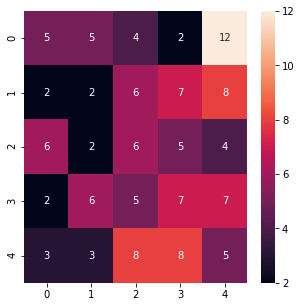

In [75]:
cm = confusion_matrix(y_test, logreg_predict)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

## KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(top_list_df,data,test_size=0.25,random_state=2)
knn=KNeighborsClassifier(n_neighbors=3)
model_knn= knn.fit(X_train,y_train)

<ipython-input-76-f34810fd7669>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_knn= knn.fit(X_train,y_train)


In [77]:
knn_predict=model_knn.predict(X_test)

In [78]:
knn=accuracy_score(knn_predict,y_test)
knn

0.15384615384615385

In [79]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           1       0.17      0.36      0.23        28
           2       0.08      0.08      0.08        25
           4       0.15      0.13      0.14        23
           6       0.25      0.11      0.15        27
           7       0.15      0.07      0.10        27

    accuracy                           0.15       130
   macro avg       0.16      0.15      0.14       130
weighted avg       0.16      0.15      0.14       130



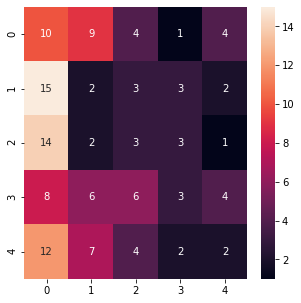

In [80]:
cm = confusion_matrix(y_test, knn_predict)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

### SVM

In [81]:
from sklearn.svm import SVC
svc=SVC()
model_svm=svc.fit(X_train,y_train)
svm_predict=model_svm.predict(X_test)

/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [82]:
svm=accuracy_score(svm_predict,y_test)
svm

0.16153846153846155

In [83]:
print(classification_report(svm_predict,y_test))

              precision    recall  f1-score   support

           1       0.07      0.12      0.09        17
           2       0.00      0.00      0.00        11
           4       0.35      0.20      0.25        40
           6       0.15      0.15      0.15        26
           7       0.26      0.19      0.22        36

    accuracy                           0.16       130
   macro avg       0.17      0.13      0.14       130
weighted avg       0.22      0.16      0.18       130



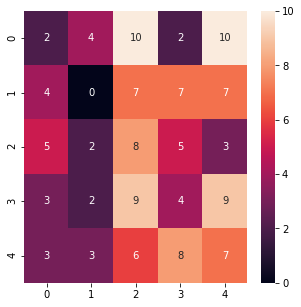

In [84]:
cm = confusion_matrix(y_test, svm_predict)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

## DT

In [85]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
model_dt=dtree.fit(X_train,y_train)

In [86]:
dtree_predict=model_dt.predict(X_test)

In [87]:
dt=accuracy_score(dtree_predict,y_test)
dt

0.2153846153846154

In [88]:
print(classification_report(dtree_predict,y_test))

              precision    recall  f1-score   support

           1       0.25      0.23      0.24        30
           2       0.08      0.11      0.09        19
           4       0.26      0.25      0.26        24
           6       0.22      0.25      0.24        24
           7       0.26      0.21      0.23        33

    accuracy                           0.22       130
   macro avg       0.21      0.21      0.21       130
weighted avg       0.22      0.22      0.22       130



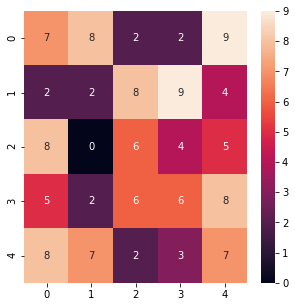

In [89]:
cm = confusion_matrix(y_test, dtree_predict)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

### RF

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model_rf=rfc.fit(X_train,y_train)

<ipython-input-90-3bbc109c0576>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf=rfc.fit(X_train,y_train)


In [91]:
rfc_predict=model_rf.predict(X_test)

In [93]:
rf=accuracy_score(rfc_predict,y_test)
rf

0.18461538461538463

In [94]:
print(classification_report(rfc_predict,y_test))

              precision    recall  f1-score   support

           1       0.14      0.15      0.15        27
           2       0.12      0.15      0.13        20
           4       0.26      0.17      0.21        35
           6       0.11      0.20      0.14        15
           7       0.30      0.24      0.27        33

    accuracy                           0.18       130
   macro avg       0.19      0.18      0.18       130
weighted avg       0.21      0.18      0.19       130



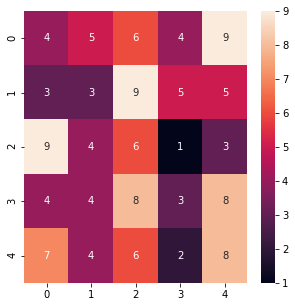

In [95]:
cm = confusion_matrix(y_test, rfc_predict)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

## AdaBoosting

In [96]:
from sklearn.ensemble import AdaBoostClassifier

In [97]:
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_adaboosting=adc.fit(X_train,y_train)

/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [98]:
adc_predict=model_adaboosting.predict(X_test)

In [99]:
adaboostin=accuracy_score(adc_predict,y_test)
adaboostin

0.16153846153846155

In [100]:
print(classification_report(adc_predict,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.12      0.18      0.14        17
           4       0.17      0.15      0.16        26
           6       0.11      0.10      0.11        30
           7       0.41      0.19      0.26        57

    accuracy                           0.16       130
   macro avg       0.16      0.12      0.13       130
weighted avg       0.25      0.16      0.19       130



/home/hemanth/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


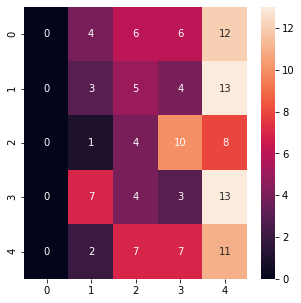

In [101]:
cm = confusion_matrix(y_test, adc_predict)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

## XGBoosting

In [102]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
model_xgb=xgb.fit(X_train,y_train)

/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [103]:
xgb_predict=model_xgb.predict(X_test)

In [105]:
xgb=accuracy_score(xgb_predict,y_test)
xgb

0.2076923076923077

In [106]:
print(classification_report(xgb_predict,y_test))

              precision    recall  f1-score   support

           1       0.29      0.30      0.29        27
           2       0.08      0.12      0.10        16
           4       0.26      0.21      0.24        28
           6       0.19      0.19      0.19        26
           7       0.22      0.18      0.20        33

    accuracy                           0.21       130
   macro avg       0.21      0.20      0.20       130
weighted avg       0.22      0.21      0.21       130



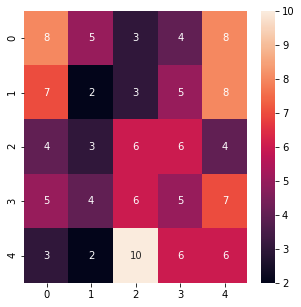

In [107]:
cm = confusion_matrix(y_test, xgb_predict)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

In [108]:
pd.DataFrame({"Model Names":['Logistic Reg','SVM','KNN','DT','RF','ADABoostin','XGB'],
            "Accuracy socre":[logistic,svm,knn,dt,rf,adaboostin,xgb]})

,Model Names,Accuracy socre
0,Logistic Reg,0.192308
1,SVM,0.161538
2,KNN,0.153846
3,DT,0.215385
4,RF,0.184615
5,ADABoostin,0.161538
6,XGB,0.207692


### Bottom_list_df

## Log_Reg

In [109]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(bottom_list_df,data,test_size=0.3,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(364, 20)
(156, 20)
(364, 1)
(156, 1)


In [110]:
logreg_b=LogisticRegression()
model_logreg_b=logreg_b.fit(X_train,y_train)

/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/hemanth/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
logreg_predict_b= model_logreg_b.predict(X_test)

In [113]:
logistic_b=accuracy_score(logreg_predict_b,y_test)
logistic_b

0.23717948717948717

In [115]:
print(classification_report(logreg_predict_b,y_test))

              precision    recall  f1-score   support

           1       0.21      0.29      0.25        24
           2       0.16      0.29      0.21        17
           4       0.38      0.20      0.26        50
           6       0.21      0.21      0.21        33
           7       0.25      0.25      0.25        32

    accuracy                           0.24       156
   macro avg       0.24      0.25      0.24       156
weighted avg       0.27      0.24      0.24       156



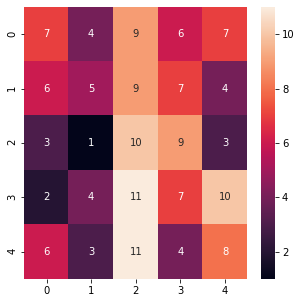

In [116]:
cm = confusion_matrix(y_test, logreg_predict_b)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

In [117]:
knn=KNeighborsClassifier(n_neighbors=3)
model_knn_b= knn.fit(X_train,y_train)

<ipython-input-117-f833c0d32670>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_knn_b= knn.fit(X_train,y_train)


In [118]:
knn_predict_b=model_knn_b.predict(X_test)


In [119]:
knn_b=accuracy_score(knn_predict_b,y_test)
knn_b

0.1987179487179487

In [120]:
print(classification_report(y_test,knn_predict_b))

              precision    recall  f1-score   support

           1       0.23      0.30      0.26        33
           2       0.26      0.32      0.29        31
           4       0.17      0.23      0.19        26
           6       0.08      0.03      0.04        34
           7       0.15      0.12      0.14        32

    accuracy                           0.20       156
   macro avg       0.18      0.20      0.19       156
weighted avg       0.18      0.20      0.18       156



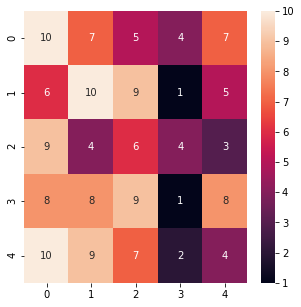

In [121]:
cm = confusion_matrix(y_test, knn_predict_b)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

## SVM

In [123]:
svc=SVC()
model_svm_b=svc.fit(X_train,y_train)

/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [124]:
svm_predict_b=model_svm_b.predict(X_test)

In [126]:
svm_b=accuracy_score(svm_predict_b,y_test)
svm_b

0.1858974358974359

In [128]:
print(classification_report(y_test,svm_predict_b))

              precision    recall  f1-score   support

           1       0.23      0.18      0.20        33
           2       0.18      0.13      0.15        31
           4       0.19      0.42      0.26        26
           6       0.24      0.15      0.18        34
           7       0.10      0.09      0.10        32

    accuracy                           0.19       156
   macro avg       0.19      0.19      0.18       156
weighted avg       0.19      0.19      0.18       156



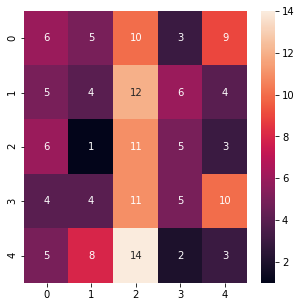

In [129]:
cm = confusion_matrix(y_test, svm_predict_b)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

### DT

In [130]:
dtree=DecisionTreeClassifier()
model_dt_b=dtree.fit(X_train,y_train)

In [158]:
dtree_predict_b=model_dt_b.predict(X_test)

In [159]:
dt_b=accuracy_score(dtree_predict_b,y_test)
dt_b

0.15384615384615385

In [160]:
print(classification_report(dtree_predict_b,y_test))

              precision    recall  f1-score   support

           1       0.24      0.31      0.27        26
           2       0.19      0.21      0.20        28
           4       0.12      0.08      0.09        38
           6       0.06      0.06      0.06        32
           7       0.16      0.16      0.16        32

    accuracy                           0.15       156
   macro avg       0.15      0.16      0.16       156
weighted avg       0.15      0.15      0.15       156



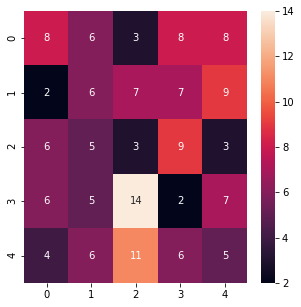

In [161]:
cm = confusion_matrix(y_test, dtree_predict_b)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

##  RF

In [136]:
rfc=RandomForestClassifier()
model_rf_b=rfc.fit(X_train,y_train)

<ipython-input-136-c5e8b097ecd9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_b=rfc.fit(X_train,y_train)


In [154]:
rfc_predict_b=model_rf_b.predict(X_test)

In [155]:
rf_b=accuracy_score(rfc_predict_b,y_test)
rf_b

0.1346153846153846

In [156]:
print(classification_report(rfc_predict_b,y_test))

              precision    recall  f1-score   support

           1       0.15      0.28      0.20        18
           2       0.03      0.07      0.04        14
           4       0.12      0.07      0.08        46
           6       0.21      0.16      0.18        43
           7       0.16      0.14      0.15        35

    accuracy                           0.13       156
   macro avg       0.13      0.14      0.13       156
weighted avg       0.15      0.13      0.13       156



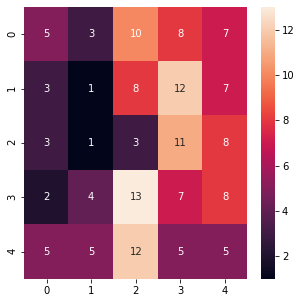

In [157]:
cm = confusion_matrix(y_test, rfc_predict_b)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

## ADBoosting

In [142]:
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_adaboosting_b=adc.fit(X_train,y_train)

/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [143]:
adc_predict_b=model_adaboosting_b.predict(X_test)

In [144]:
adb_b=accuracy_score(adc_predict_b,y_test)
adb_b


0.22435897435897437

In [145]:
print(classification_report(adc_predict_b,y_test))

              precision    recall  f1-score   support

           1       0.18      0.32      0.23        19
           2       0.00      0.00      0.00         0
           4       0.62      0.18      0.28        88
           6       0.00      0.00      0.00         0
           7       0.41      0.27      0.32        49

    accuracy                           0.22       156
   macro avg       0.24      0.15      0.17       156
weighted avg       0.50      0.22      0.29       156



/home/hemanth/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


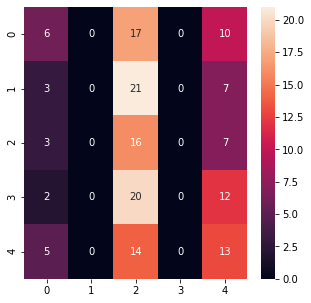

In [146]:
cm = confusion_matrix(y_test, adc_predict_b)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

## XGBOOSting

In [147]:
xgb=XGBClassifier()
model_xgb_b=xgb.fit(X_train,y_train)

/home/hemanth/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [149]:
xgb_predict_b=model_xgb_b.predict(X_test)

In [151]:
xgb_b=accuracy_score(xgb_predict_b,y_test)
xgb_b

0.19230769230769232

In [152]:
print(classification_report(xgb_predict_b,y_test))

              precision    recall  f1-score   support

           1       0.24      0.35      0.29        23
           2       0.19      0.25      0.22        24
           4       0.12      0.10      0.11        29
           6       0.21      0.19      0.20        37
           7       0.19      0.14      0.16        43

    accuracy                           0.19       156
   macro avg       0.19      0.21      0.19       156
weighted avg       0.19      0.19      0.19       156



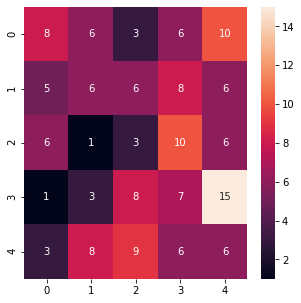

In [153]:
cm = confusion_matrix(y_test, xgb_predict_b)
plt.figure(figsize=(5,5))
p=sns.heatmap(cm, annot=True)

In [163]:
pd.DataFrame({"Model Names_Bottom_list_df":['Logistic Reg','SVM','KNN','DT','RF','ADABoostin','XGB'],
            "Accuracy socre":[logistic_b,svm_b,knn_b,dt_b,rf_b,adb_b,xgb_b]})

,Model Names_Bottom_list_df,Accuracy socre
0,Logistic Reg,0.237179
1,SVM,0.185897
2,KNN,0.198718
3,DT,0.153846
4,RF,0.134615
5,ADABoostin,0.224359
6,XGB,0.192308
